<h2>Exploring the safest neighorhoods of City of Vancouver using crime stastistics and foursquare API</h2>

<h4>Introduction to business problem.</h4>

This project aims to explore the safest neighborhoods of the city of Vancouver based on the crime stastistics data leveraging foursquare API.
This proejct is targeted for the people who are new to the country or is willing to relocate to a new city which is unkown to them inlcluding students. 

<h4>Importing required libraries</h3>

In [1]:
import requests # library to handle request
import pandas as pd 
import numpy as np
import random
import seaborn as sns



!conda install -c conda-forge geopy --yes 
 # module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim # module to convert latitudes into longitudes


# libraries for displaying images

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt


import folium # map rendering library
%matplotlib inline
sns.set_style('whitegrid')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



<h3>Part 1: getting the crime stastistcs data from https://www.kaggle.com/wosaku/crime-in-vancouver</h3><br>
about the file:<br>
1.type of crime <br>
2.neighbourhood <br>
3.year <br>
4.date and timen <br>
5.location coordinates <br>


In [2]:
df=pd.read_csv('crime.csv')
df['number']=1

In [3]:
df.head()


,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,Latitude,Longitude,number
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,1
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,1
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,1
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,1
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,49.269802,-123.083763,1


In [4]:
#dropping all unecessary columns
df.drop(['MONTH','DAY','HOUR','MINUTE','HUNDRED_BLOCK'],axis=1)

,TYPE,YEAR,NEIGHBOURHOOD,Latitude,Longitude,number
0,Other Theft,2003,Strathcona,49.269802,-123.083763,1
1,Other Theft,2003,Strathcona,49.269802,-123.083763,1
2,Other Theft,2003,Strathcona,49.269802,-123.083763,1
3,Other Theft,2003,Strathcona,49.269802,-123.083763,1
4,Other Theft,2003,Strathcona,49.269802,-123.083763,1
...,...,...,...,...,...,...
530647,Break and Enter Residential/Other,2017,Hastings-Sunrise,49.277420,-123.037595,1
530648,Mischief,2017,Grandview-Woodland,49.264163,-123.075129,1
530649,Offence Against a Person,2017,NaN,0.000000,0.000000,1
530650,Theft from Vehicle,2017,Central Business District,49.278168,-123.117031,1


In [5]:
df.dropna(axis=0,inplace=True)

<h4>visualizing types of different crime committed within the years</h4>

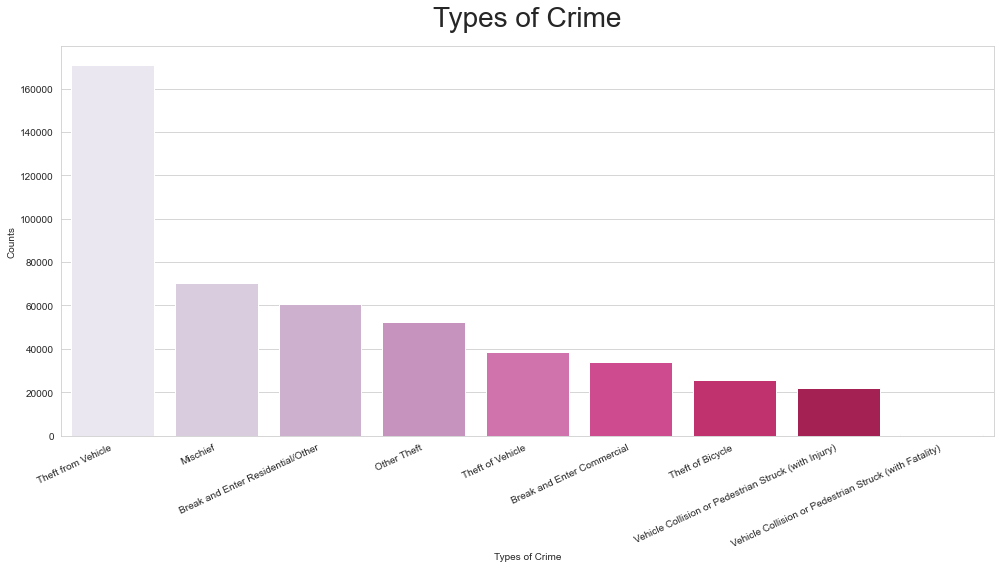

In [6]:
plt.figure(figsize=(14,8))
plt.title('Types of Crime',fontdict={'fontsize':'28'},pad=20)
ax = sns.countplot(x='TYPE',data=df,palette='PuRd', order = df['TYPE'].value_counts().index)
ax.set(xlabel='Types of Crime')
ax.set(ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()


<h4>crime committed in vancouver based on year map</h4>

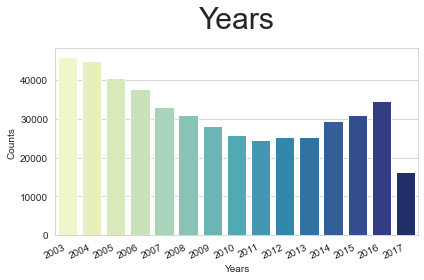

In [7]:
plt.title('Years',fontdict={'fontsize':'30'},pad=20)
ax = sns.countplot(x='YEAR',data=df,palette='YlGnBu')
ax.set(xlabel='Years', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
plt.tight_layout()

<h4>Exploring safest neighbourgoods based on crime statistics over the years</h4>

In [8]:
df2=df.groupby(['NEIGHBOURHOOD'])['TYPE'].count().sort_values(ascending=True).head(10)


In [9]:
df2

NEIGHBOURHOOD
Musqueam               532
Stanley Park          3775
South Cambie          5212
Shaughnessy           5426
West Point Grey       5870
Arbutus Ridge         6066
Kerrisdale            7447
Dunbar-Southlands     7746
Oakridge              8035
Killarney            10475
Name: TYPE, dtype: int64

In [10]:
pd.DataFrame(df2)

,TYPE
NEIGHBOURHOOD,
Musqueam,532
Stanley Park,3775
South Cambie,5212
Shaughnessy,5426
West Point Grey,5870
Arbutus Ridge,6066
Kerrisdale,7447
Dunbar-Southlands,7746
Oakridge,8035


<h4>Areas with most number of crime </h4>

In [11]:
df3 = df.groupby(['NEIGHBOURHOOD'])['TYPE'].count().sort_values(ascending=False).head(10)
df3


NEIGHBOURHOOD
Central Business District    110945
West End                      41352
Fairview                      32161
Mount Pleasant                30534
Grandview-Woodland            27180
Renfrew-Collingwood           26761
Kitsilano                     26698
Kensington-Cedar Cottage      24941
Strathcona                    20917
Hastings-Sunrise              18126
Name: TYPE, dtype: int64

<h4>We will stay clear of these areas while exploring the neighbourhoods.</h4>

In [12]:
pd.DataFrame(df3)

,TYPE
NEIGHBOURHOOD,
Central Business District,110945
West End,41352
Fairview,32161
Mount Pleasant,30534
Grandview-Woodland,27180
Renfrew-Collingwood,26761
Kitsilano,26698
Kensington-Cedar Cottage,24941
Strathcona,20917


<h4></h4>

In [13]:
van_crime=pd.pivot_table(df,values=['number'],index=['NEIGHBOURHOOD'],columns=['TYPE'],aggfunc=np.sum,fill_value=0)

In [14]:
van_crime.head()

number  \
TYPE                      Break and Enter Commercial   
NEIGHBOURHOOD                                          
Arbutus Ridge                                    325   
Central Business District                       9371   
Dunbar-Southlands                                294   
Fairview                                        3303   
Grandview-Woodland                              2082   

                                                                      \
TYPE                      Break and Enter Residential/Other Mischief   
NEIGHBOURHOOD                                                          
Arbutus Ridge                                          1672      934   
Central Business District                              3505    16671   
Dunbar-Southlands                                      1847     1324   
Fairview                                               3834     3196   
Grandview-Woodland                                     4515     4970   

                                                                           \
TYPE                      Other Theft Theft from Vehicle Theft of Bicycle   
NEIGHBOURHOOD                                                               
Arbutus Ridge                     337               1852              160   
Central Business District       19243              48003             6907   
Dunbar-Southlands                 241               2899              240   
Fairview                         3269              11934             3394   
Grandview-Woodland               2508               7342             1403   

                                            \
TYPE                      Theft of Vehicle   
NEIGHBOURHOOD                                
Arbutus Ridge                          498   
Central Business District             4016   
Dunbar-Southlands                      629   
Fairview                              2037   
Grandview-Woodland                    3111   

                                                                                  \
TYPE                      Vehicle Collision or Pedestrian Struck (with Fatality)   
NEIGHBOURHOOD                                                                      
Arbutus Ridge                                                              3       
Central Business District                                                 41       
Dunbar-Southlands                                                          3       
Fairview                                                                  14       
Grandview-Woodland                                                         9       

                                                                                
TYPE                      Vehicle Collision or Pedestrian Struck (with Injury)  
NEIGHBOURHOOD                                                                   
Arbutus Ridge                                                            285    
Central Business District                                               3188    
Dunbar-Southlands                                                        269    
Fairview                                                                1180    
Grandview-Woodland                                                      1240

<h3>Methodology</h3><hr>
methodology is decribed into two steps:<br>
1. exporatory data analysis - vislualizing the crime rates in the city of vancouver and then narrowing down the list of safest neighborhoods based on thier count and their severity.<br>
2. modelling- to assist the process of segmenting the similar neighborhoods the unsupervised ML algorithm of k-means clustering will be employed. 

In [15]:
van_crime.describe()

number                                    \
TYPE  Break and Enter Commercial Break and Enter Residential/Other   
count                  24.000000                         24.000000   
mean                 1410.041667                       2535.666667   
std                  1953.128026                       1253.868957   
min                    17.000000                         65.000000   
25%                   322.250000                       1813.000000   
50%                   888.500000                       2513.000000   
75%                  2084.500000                       3486.250000   
max                  9371.000000                       4515.000000   

                                                                       \
TYPE       Mischief   Other Theft Theft from Vehicle Theft of Bicycle   
count     24.000000     24.000000          24.000000         24.00000   
mean    2923.208333   2173.333333        7120.375000       1067.50000   
std     3325.900100   3959.905573        9528.086476       1606.50022   
min      104.000000      1.000000         217.000000          7.00000   
25%      922.750000    263.750000        2676.250000        177.25000   
50%     1850.000000    876.000000        4210.000000        288.00000   
75%     3791.500000   2621.250000        7710.500000       1112.00000   
max    16671.000000  19243.000000       48003.000000       6907.00000   

                                                                               \
TYPE  Theft of Vehicle Vehicle Collision or Pedestrian Struck (with Fatality)   
count        24.000000                                          24.000000       
mean       1597.958333                                          10.583333       
std        1131.298388                                           8.459194       
min          40.000000                                           1.000000       
25%         534.750000                                           5.500000       
50%        1494.000000                                           9.500000       
75%        2502.500000                                          13.250000       
max        4016.000000                                          41.000000       

                                                            
TYPE  Vehicle Collision or Pedestrian Struck (with Injury)  
count                                          24.000000    
mean                                          911.958333    
std                                           676.983301    
min                                            59.000000    
25%                                           386.750000    
50%                                           858.500000    
75%                                          1247.500000    
max                                          3188.000000

In [16]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Matplotlib version:  3.2.2


<h3>Based on the areas with lesat number of crime.</h3>
<h4> We will create new dataframe consisting of the latitude and longitude coordinates of safest neighbourhoods of vancouver.</h4>

In [17]:
Neighbourhood=['Stanley Park','South Cambie','Shaughnessy','West Point Grey','Arbutus Ridge','Kerrisdale','Dunbar-Southlands']
Latitude = ['','','','','','','']
Longitude = ['','','','','','','']

df_neigh={'Neighbourhood':Neighbourhood, 'Latitude':Latitude,'Longitude':Longitude}
van_neigh=pd.DataFrame(data=df_neigh, columns=['Neighbourhood', 'Latitude', 'Longitude'], index=None)
van_neigh

,Neighbourhood,Latitude,Longitude
0,Stanley Park,,
1,South Cambie,,
2,Shaughnessy,,
3,West Point Grey,,
4,Arbutus Ridge,,
5,Kerrisdale,,
6,Dunbar-Southlands,,


<h4>getting the Co-ordiantes of safest Neighborhood in Vancouver</h4>

In [18]:

Latitude = []
Longitude = []

for i in range(len(Neighbourhood)):
    address = '{},Vancouver,Canada'.format(Neighbourhood[i])
    geolocator = Nominatim(user_agent="Vancouver_agent")
    location = geolocator.geocode(address)
    Latitude.append(location.latitude)
    Longitude.append(location.longitude)
print(Latitude, Longitude)

[49.3019112, 49.2464639, 49.24630515, 49.268102150000004, 49.24630515, 49.2209848, 49.23786405] [-123.14154052837662, -123.12160272080624, -123.13840505989171, -123.20264254731434, -123.15963596031234, -123.1595483795563, -123.18435438641457]


In [19]:
df_neigh={'Neighbourhood':Neighbourhood,'Latitude':Latitude,'Longitude':Longitude}
van_neigh=pd.DataFrame(data=df_neigh, columns=['Neighbourhood','Latitude','Longitude'],index=None)
van_neigh

,Neighbourhood,Latitude,Longitude
0,Stanley Park,49.301911,-123.141541
1,South Cambie,49.246464,-123.121603
2,Shaughnessy,49.246305,-123.138405
3,West Point Grey,49.268102,-123.202643
4,Arbutus Ridge,49.246305,-123.159636
5,Kerrisdale,49.220985,-123.159548
6,Dunbar-Southlands,49.237864,-123.184354


In [20]:
address = 'Stanley Park, Vancouver, Canada'

geolocator = Nominatim(user_agent="vn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Stanley Park, Vancouver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Stanley Park, Vancouver are 49.3019112, -123.14154052837662.


<h4>Visualizing the neighbourhoods of above dataframe</h4>

In [21]:
# create map of vancouver using latitude and longitude values
map_van = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(van_neigh['Latitude'], van_neigh['Longitude'], van_neigh['Neighbourhood']):
    label = ' {}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_van)  
    
map_van

<h3>Defining foursqaure credentials</h3>

In [22]:
#defining foursqare credentials
CLIENT_ID = 'ER21BIC3MMJAXGZC53QHK2IKP5GWA0CGS3ZRZN4M4CDOW32G' # your Foursquare ID
CLIENT_SECRET = '24WGVOJELWKWGFZXY4AYJG31G4MAJFAO1XXMFJTIE2NQMQQR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ER21BIC3MMJAXGZC53QHK2IKP5GWA0CGS3ZRZN4M4CDOW32G
CLIENT_SECRET:24WGVOJELWKWGFZXY4AYJG31G4MAJFAO1XXMFJTIE2NQMQQR


<h3>Modelling</h3><br>
1. finding all the venues within a radius of 500 meters.<br>
2. performing one hotencoding of the dataframe venues. to build a ML model<br>
3. grouping the venues by thier neighbourhood and calculating thier mean.<br>
4. performing k-means clustering.

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue',
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
van_venues = getNearbyVenues(names=van_neigh['Neighbourhood'],
                                   latitudes=van_neigh['Latitude'],
                                   longitudes=van_neigh['Longitude']
                                  )

Stanley Park
South Cambie
Shaughnessy
West Point Grey
Arbutus Ridge
Kerrisdale
Dunbar-Southlands


In [25]:
print(van_neigh.shape)
van_venues.head()

(7, 3)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Stanley Park,49.301911,-123.141541,Stanley Park,49.302488,-123.141718,Park
1,Stanley Park,49.301911,-123.141541,Beaver Lake Trail,49.303440,-123.137298,Trail
2,Stanley Park,49.301911,-123.141541,Propesct Point Picnic Site,49.303014,-123.146194,Park
3,Stanley Park,49.301911,-123.141541,Tatlow Walk,49.298357,-123.141636,Trail
4,Stanley Park,49.301911,-123.141541,Beaver Lake,49.305053,-123.138252,Lake


In [26]:
van_venues.groupby('Neighbourhood').count()

,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Arbutus Ridge,10,10,10,10,10,10
Dunbar-Southlands,12,12,12,12,12,12
Kerrisdale,4,4,4,4,4,4
Shaughnessy,5,5,5,5,5,5
South Cambie,16,16,16,16,16,16
Stanley Park,5,5,5,5,5,5
West Point Grey,7,7,7,7,7,7


In [27]:
print('There are {} uniques categories.'.format(len(van_venues['Venue Category'].unique())))

There are 33 uniques categories.


<h4>One hot encoding</h4>

In [28]:
van_onehot = pd.get_dummies(van_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
van_onehot['Neighbourhood'] = van_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [van_onehot.columns[-1]] + list(van_onehot.columns[:-1])
van_onehot = van_onehot[fixed_columns]

van_onehot.head()

,Neighbourhood,Bakery,Bank,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Chocolate Shop,Coffee Shop,Dance Studio,...,Park,Performing Arts Venue,Pet Store,Pool,Sandwich Place,Seafood Restaurant,Shopping Mall,Sushi Restaurant,Trail,Vietnamese Restaurant
0,Stanley Park,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,Stanley Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Stanley Park,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Stanley Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Stanley Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<h4>Grouping rows by each category and by taking the mean of the frequency of occurence of each category</h4>

In [29]:
van_grouped = van_onehot.groupby('Neighbourhood').mean().reset_index()
van_grouped

,Neighbourhood,Bakery,Bank,Bus Stop,Cafeteria,Café,Cantonese Restaurant,Chocolate Shop,Coffee Shop,Dance Studio,...,Park,Performing Arts Venue,Pet Store,Pool,Sandwich Place,Seafood Restaurant,Shopping Mall,Sushi Restaurant,Trail,Vietnamese Restaurant
0,Arbutus Ridge,0.1,0.0000,0.000000,0.0000,0.000000,0.0000,0.0,0.100000,0.1,...,0.000000,0.000000,0.000000,0.00,0.100000,0.1,0.1000,0.0000,0.0,0.0000
1,Dunbar-Southlands,0.0,0.0000,0.083333,0.0000,0.083333,0.0000,0.0,0.083333,0.0,...,0.000000,0.000000,0.083333,0.00,0.000000,0.0,0.0000,0.0000,0.0,0.0000
2,Kerrisdale,0.0,0.0000,0.000000,0.0000,0.250000,0.0000,0.0,0.000000,0.0,...,0.250000,0.000000,0.000000,0.25,0.000000,0.0,0.0000,0.0000,0.0,0.0000
3,Shaughnessy,0.0,0.0000,0.600000,0.0000,0.000000,0.0000,0.2,0.000000,0.0,...,0.200000,0.000000,0.000000,0.00,0.000000,0.0,0.0000,0.0000,0.0,0.0000
4,South Cambie,0.0,0.0625,0.000000,0.0625,0.062500,0.0625,0.0,0.250000,0.0,...,0.062500,0.000000,0.000000,0.00,0.000000,0.0,0.0625,0.0625,0.0,0.0625
5,Stanley Park,0.0,0.0000,0.000000,0.0000,0.000000,0.0000,0.0,0.000000,0.0,...,0.400000,0.000000,0.000000,0.00,0.000000,0.0,0.0000,0.0000,0.4,0.0000
6,West Point Grey,0.0,0.0000,0.000000,0.0000,0.000000,0.0000,0.0,0.000000,0.0,...,0.142857,0.142857,0.000000,0.00,0.142857,0.0,0.0000,0.0000,0.0,0.0000


In [30]:
van_grouped.shape

(7, 34)

In [31]:
num_top_venues = 5

for hood in van_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = van_grouped[van_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus Ridge----
                venue  freq
0              Bakery   0.1
1        Liquor Store   0.1
2       Shopping Mall   0.1
3  Seafood Restaurant   0.1
4      Sandwich Place   0.1


----Dunbar-Southlands----
                  venue  freq
0         Grocery Store  0.25
1          Liquor Store  0.17
2                   Gym  0.08
3              Bus Stop  0.08
4  Gym / Fitness Center  0.08


----Kerrisdale----
         venue  freq
0         Pool  0.25
1  Golf Course  0.25
2         Café  0.25
3         Park  0.25
4    Pet Store  0.00


----Shaughnessy----
            venue  freq
0        Bus Stop   0.6
1  Chocolate Shop   0.2
2            Park   0.2
3          Bakery   0.0
4       Pet Store   0.0


----South Cambie----
                   venue  freq
0            Coffee Shop  0.25
1  Vietnamese Restaurant  0.06
2          Shopping Mall  0.06
3                   Park  0.06
4                   Bank  0.06


----Stanley Park----
                  venue  freq
0                 Trail   0

<h4>Creating dataframe of the venues</h4>
functions to sort venues in ascending order.

In [32]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

<h4>create the new dataframe and display the top 10 venues for each neighbourhood</h4>

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = van_grouped['Neighbourhood']

for ind in np.arange(van_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(van_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head(10)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus Ridge,Bakery,Liquor Store,Grocery Store,Shopping Mall,Seafood Restaurant,Sandwich Place,Fast Food Restaurant,Discount Store,Dance Studio,Coffee Shop
1,Dunbar-Southlands,Grocery Store,Liquor Store,Gym,Pet Store,Gym / Fitness Center,Japanese Restaurant,Coffee Shop,Café,Bus Stop,Cantonese Restaurant
2,Kerrisdale,Café,Pool,Golf Course,Park,Vietnamese Restaurant,Dance Studio,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf
3,Shaughnessy,Bus Stop,Chocolate Shop,Park,Vietnamese Restaurant,Dance Studio,Gift Shop,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf
4,South Cambie,Coffee Shop,Vietnamese Restaurant,Café,Grocery Store,Malay Restaurant,Gift Shop,Cantonese Restaurant,Park,Cafeteria,Bank
5,Stanley Park,Park,Trail,Lake,Golf Course,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf,Dance Studio,Vietnamese Restaurant
6,West Point Grey,Gym,Performing Arts Venue,Gym / Fitness Center,Harbor / Marina,Disc Golf,Park,Sandwich Place,Café,Cantonese Restaurant,Gift Shop


<h3>Clustering the neighbourhoods with similar features using k-means clustering.</h3>

In [34]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

van_grouped_clustering = van_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(van_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 3, 1, 0, 2, 4])

In [35]:
# add clustering labels
neighbourhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

van_merged = van_neigh

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
van_merged = van_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

van_merged.head() # check the last columns!

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Stanley Park,49.301911,-123.141541,2,Park,Trail,Lake,Golf Course,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf,Dance Studio,Vietnamese Restaurant
1,South Cambie,49.246464,-123.121603,0,Coffee Shop,Vietnamese Restaurant,Café,Grocery Store,Malay Restaurant,Gift Shop,Cantonese Restaurant,Park,Cafeteria,Bank
2,Shaughnessy,49.246305,-123.138405,1,Bus Stop,Chocolate Shop,Park,Vietnamese Restaurant,Dance Studio,Gift Shop,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf
3,West Point Grey,49.268102,-123.202643,4,Gym,Performing Arts Venue,Gym / Fitness Center,Harbor / Marina,Disc Golf,Park,Sandwich Place,Café,Cantonese Restaurant,Gift Shop
4,Arbutus Ridge,49.246305,-123.159636,0,Bakery,Liquor Store,Grocery Store,Shopping Mall,Seafood Restaurant,Sandwich Place,Fast Food Restaurant,Discount Store,Dance Studio,Coffee Shop


In [36]:
van_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighbourhood           7 non-null      object 
 1   Latitude                7 non-null      float64
 2   Longitude               7 non-null      float64
 3   Cluster Labels          7 non-null      int32  
 4   1st Most Common Venue   7 non-null      object 
 5   2nd Most Common Venue   7 non-null      object 
 6   3rd Most Common Venue   7 non-null      object 
 7   4th Most Common Venue   7 non-null      object 
 8   5th Most Common Venue   7 non-null      object 
 9   6th Most Common Venue   7 non-null      object 
 10  7th Most Common Venue   7 non-null      object 
 11  8th Most Common Venue   7 non-null      object 
 12  9th Most Common Venue   7 non-null      object 
 13  10th Most Common Venue  7 non-null      object 
dtypes: float64(2), int32(1), object(11)
memory usa

In [37]:
# Dropping the row with the NaN value 
van_merged.dropna(inplace = True)

In [38]:
van_merged.shape

(7, 14)

In [39]:
van_merged['Cluster Labels'] = van_merged['Cluster Labels'].astype(int)

In [40]:
van_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighbourhood           7 non-null      object 
 1   Latitude                7 non-null      float64
 2   Longitude               7 non-null      float64
 3   Cluster Labels          7 non-null      int32  
 4   1st Most Common Venue   7 non-null      object 
 5   2nd Most Common Venue   7 non-null      object 
 6   3rd Most Common Venue   7 non-null      object 
 7   4th Most Common Venue   7 non-null      object 
 8   5th Most Common Venue   7 non-null      object 
 9   6th Most Common Venue   7 non-null      object 
 10  7th Most Common Venue   7 non-null      object 
 11  8th Most Common Venue   7 non-null      object 
 12  9th Most Common Venue   7 non-null      object 
 13  10th Most Common Venue  7 non-null      object 
dtypes: float64(2), int32(1), object(11)
memory usa

<h3>visualizing the clusters</h3>

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11.5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(van_merged['Latitude'], van_merged['Longitude'], van_merged['Neighbourhood'], van_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

Each cluster is color coded for the ease of presentation, we can see that majority of the neighborhood falls in the red cluster which is the first cluster. Three neighborhoods have their own cluster (Blue, Purple and Yellow), these are clusters two three and five. The green cluster consists of two neighborhoods which is the 4th cluster.

<h3>Cluster analysis</h3>
analyse each cluster in order to identify the silimar characteristics of each cluster and the neighbourhoods in them.

<h4>examining the first cluster</h4>

In [42]:
van_merged[van_merged['Cluster Labels'] == 0]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,South Cambie,49.246464,-123.121603,0,Coffee Shop,Vietnamese Restaurant,Café,Grocery Store,Malay Restaurant,Gift Shop,Cantonese Restaurant,Park,Cafeteria,Bank
4,Arbutus Ridge,49.246305,-123.159636,0,Bakery,Liquor Store,Grocery Store,Shopping Mall,Seafood Restaurant,Sandwich Place,Fast Food Restaurant,Discount Store,Dance Studio,Coffee Shop
6,Dunbar-Southlands,49.237864,-123.184354,0,Grocery Store,Liquor Store,Gym,Pet Store,Gym / Fitness Center,Japanese Restaurant,Coffee Shop,Café,Bus Stop,Cantonese Restaurant


<h4>Examining second cluster</h4>

In [43]:
van_merged[van_merged['Cluster Labels'] == 1]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Shaughnessy,49.246305,-123.138405,1,Bus Stop,Chocolate Shop,Park,Vietnamese Restaurant,Dance Studio,Gift Shop,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf


<h4>examining the third cluster</h4>

In [44]:
van_merged[van_merged['Cluster Labels'] == 2]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Stanley Park,49.301911,-123.141541,2,Park,Trail,Lake,Golf Course,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf,Dance Studio,Vietnamese Restaurant


<h4>examining the fourth cluster</h4>

In [45]:
van_merged[van_merged['Cluster Labels'] == 3]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Kerrisdale,49.220985,-123.159548,3,Café,Pool,Golf Course,Park,Vietnamese Restaurant,Dance Studio,Furniture / Home Store,Fast Food Restaurant,Discount Store,Disc Golf


<h4>examining the fifth cluster</h4>

In [46]:
van_merged[van_merged['Cluster Labels'] == 4]

,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,West Point Grey,49.268102,-123.202643,4,Gym,Performing Arts Venue,Gym / Fitness Center,Harbor / Marina,Disc Golf,Park,Sandwich Place,Café,Cantonese Restaurant,Gift Shop


<h3>Results and discussion</h3>
The whole methodology of the project is based on the neighborhood data using foursquare API and how integrating them with criminal statistics can employed to significantly improve the possibility of search of safest neighborhood  when a person is planning is planning to move a new unknown city. This shows the importance of neighborhood and their role in assisting the decision making process.
Using this project I tried to explore the crime statistics of neighborhoods of the city of Vancouver and then conducted exploratory data analysis on the different types of crime committed on different neighborhoods and using this I was able to narrow down the safest places in city based on their crime count the severity of the crimes. This data was then used to explore the safest neighborhoods in city based on their top venue offering for example the person who likes to engage in recreational activities can look for house in areas on second cluster i.e. Stanley park, and if a person in not so outgoing and want all the basic amenities in their close vicinity i.e. grocery store, bus stops, gyms and coffee shops can looks for neighborhoods in the first cluster comprising of South Cambie, Arbutus ridge and Dunbar-Southlands.
As the scope of this project was based on the battle of neighborhoods I only considered the top venues offering of particular and limited number of neighborhoods, one can dig further to a bit more of web scrapping and look for more holistic view of an neighborhood based on their housing prices and ease of commute and police surveillance and security.<br>


<h3>Conclusion</h3>
Search for a locality that has the best to offer can be challenging and time-consuming relying on data just based on internet, as it could be vague and very vast. Through the tools I employed in this project I filtered down the safest neighborhoods the city can offer and then further analysis of each neighborhood to get idea of the top venues the locality has to offer, the search for the dream home in a city unknown to a person can be very strenuous and difficult for a person thus with application of this project that problem had been addressed. The future work can include looking for home based one’s spending power and type of locality the person want to settle down to so that his/her family could safe and live the best out of everything. I’m glad to complete the search for the best neighborhood with minimum effort to enhance the very vague and time-consuming problem.  
